# This file serve as making the whole process test runs with class

In [1]:
import sys
import os

# Get the parent directory of the notebook
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))


# Add the project directory to the Python path
sys.path.append(project_path)

# Now you can import the class
from classes.pdf_parser import JoradpFileParse
from classes.ocr_processor import OcrProcessor
from classes.image_builder import ImageBuilder
from classes.joradp_importer import JoradpImporter

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parserImages = JoradpFileParse("../data_test/F2024080.pdf")
ocr = OcrProcessor()

Loaded layout model datalab-to/surya_layout0 on device cpu with dtype torch.float32
Loaded detection model vikp/surya_det3 on device cpu with dtype torch.float32
Loaded recognition model vikp/surya_rec2 on device cpu with dtype torch.float32


In [3]:
parserImages.get_images()

In [4]:
parserImages.resize_image_to_fit_ocr()

In [5]:
parserImages.crop_all_images(top=120, left=80, right=80, bottom=100)

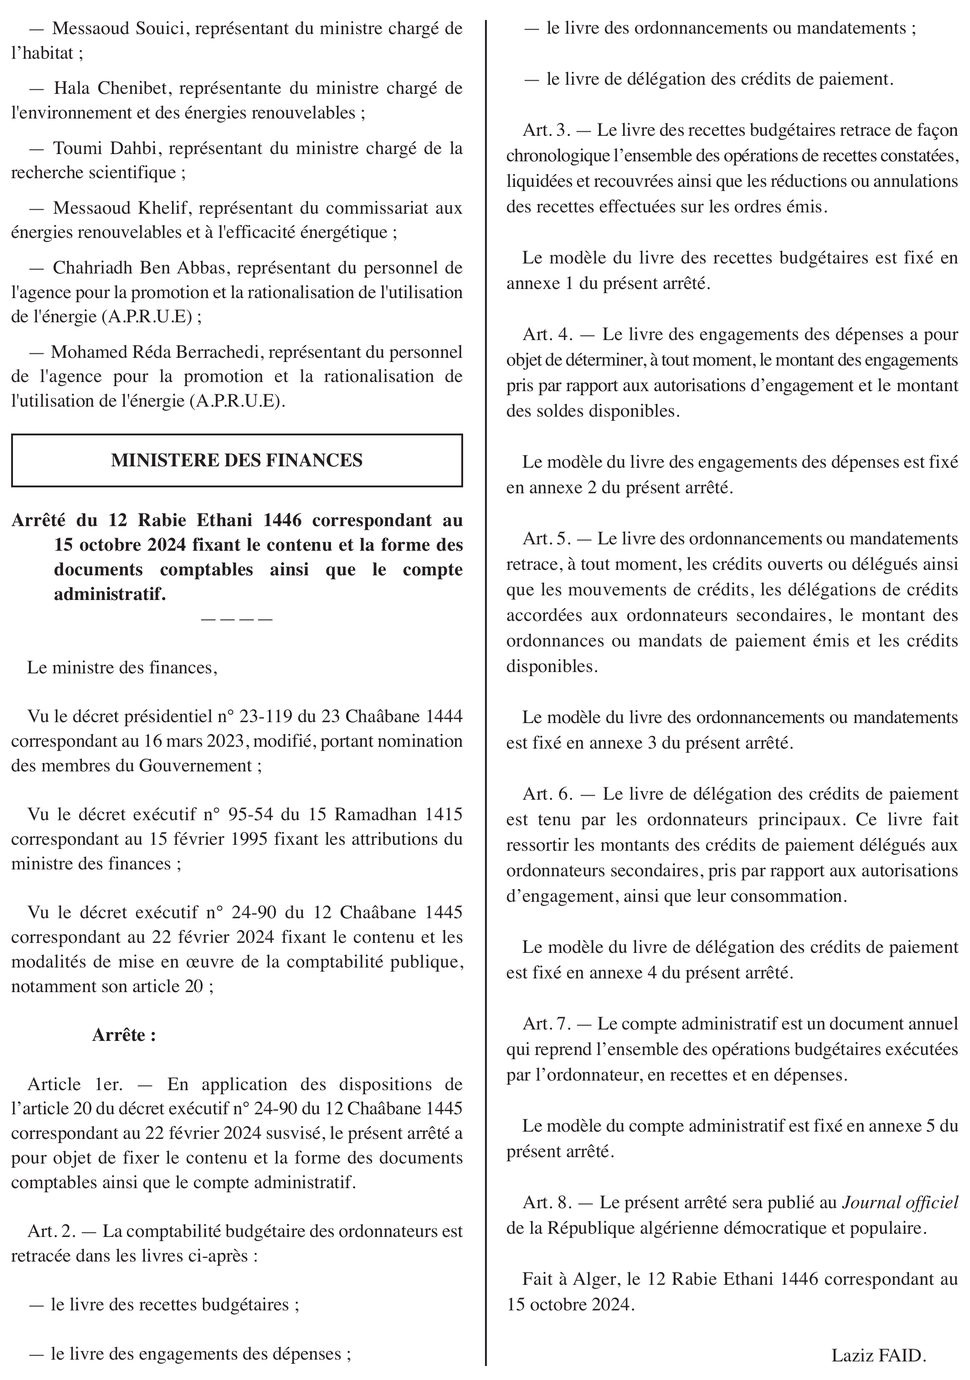

In [14]:
parserImages.images[10]

In [11]:
ocr.is_vertical_orientation_correct(parserImages.images[22], debug=False)

False

In [12]:
[ocr.is_vertical_orientation_correct(image, debug=False) for image in parserImages.images]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True]

In [55]:
layouts = ocr.run_layout_order_detection(parserImages.images[24])

Recognizing layout: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.34s/it]


In [19]:
from PIL import Image
def rotate_image_90_degrees(image: Image, clockwise: bool = False) -> Image:
        """
        Rotate an image by 90 degrees while adjusting the height and width.

        Args:
            image (PIL.Image.Image): The image to rotate.
            clockwise (bool): Rotate clockwise if True, otherwise counterclockwise.

        Returns:
            PIL.Image.Image: The rotated image.
        """
        # Rotate the image
        if clockwise:
            rotated_image = image.transpose(Image.Transpose.ROTATE_270)
        else:
            rotated_image = image.transpose(Image.Transpose.ROTATE_90)
        
        return rotated_image

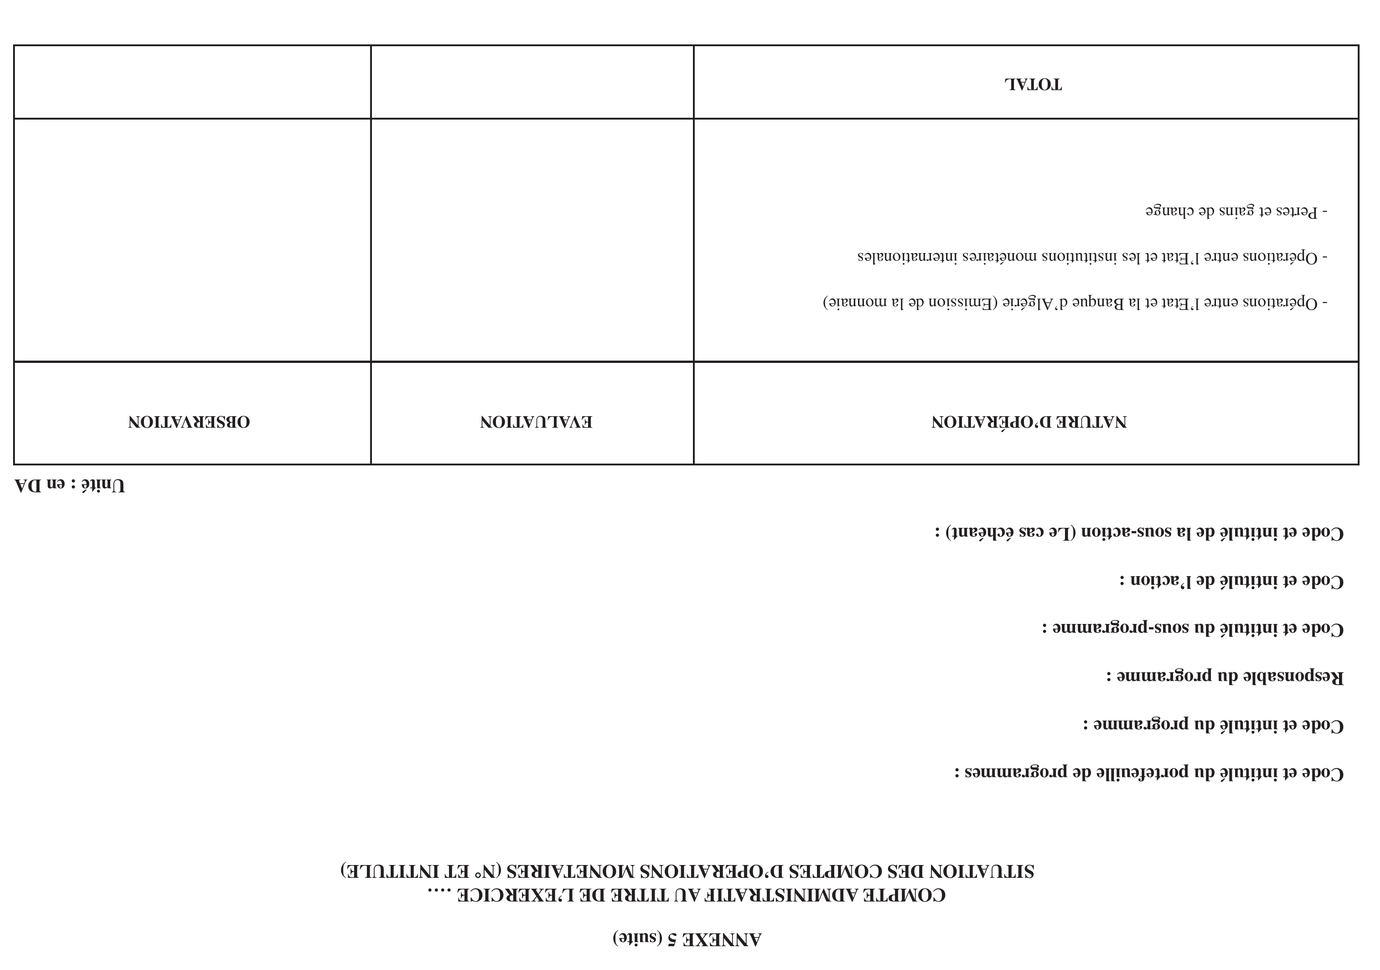

In [20]:
rotate_image_90_degrees(parserImages.images[22])

In [8]:
## detected_textes = ocr.run_text_recognition_fr(parserImages.images[6], layouts)

In [56]:
detected_textes = ocr.run_ocr_separate_text_recognition_fr(parserImages.images[24])

Recognizing Text: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:00<00:00, 60.13s/it]


In [60]:
imageTest = ImageBuilder(image=parserImages.images[24], layout_data=layouts, text_data=detected_textes)

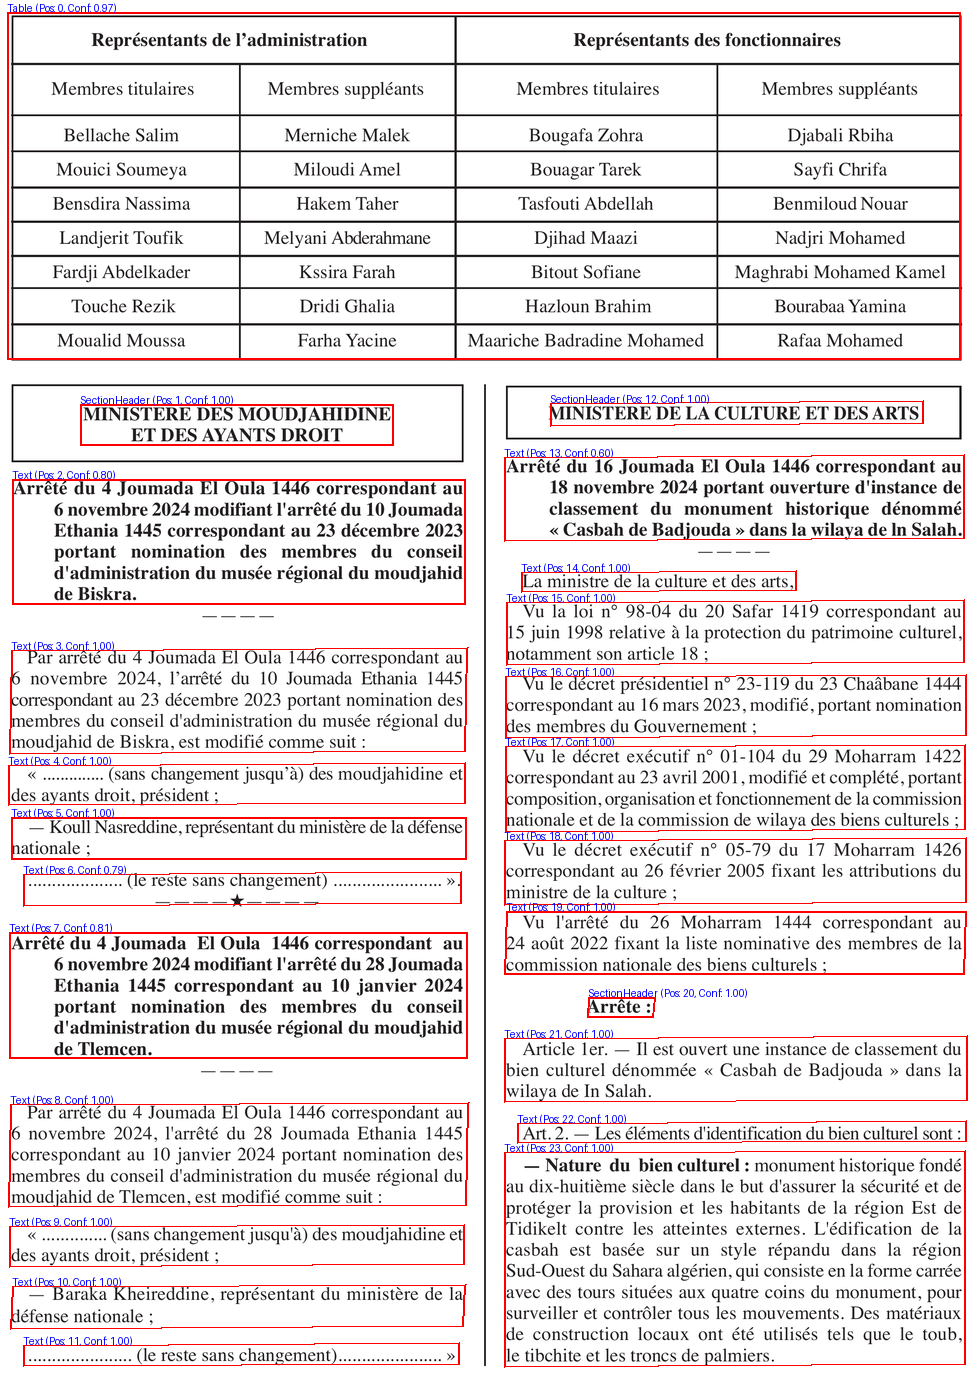

In [61]:
imageTest.draw_order_layout_on_image()

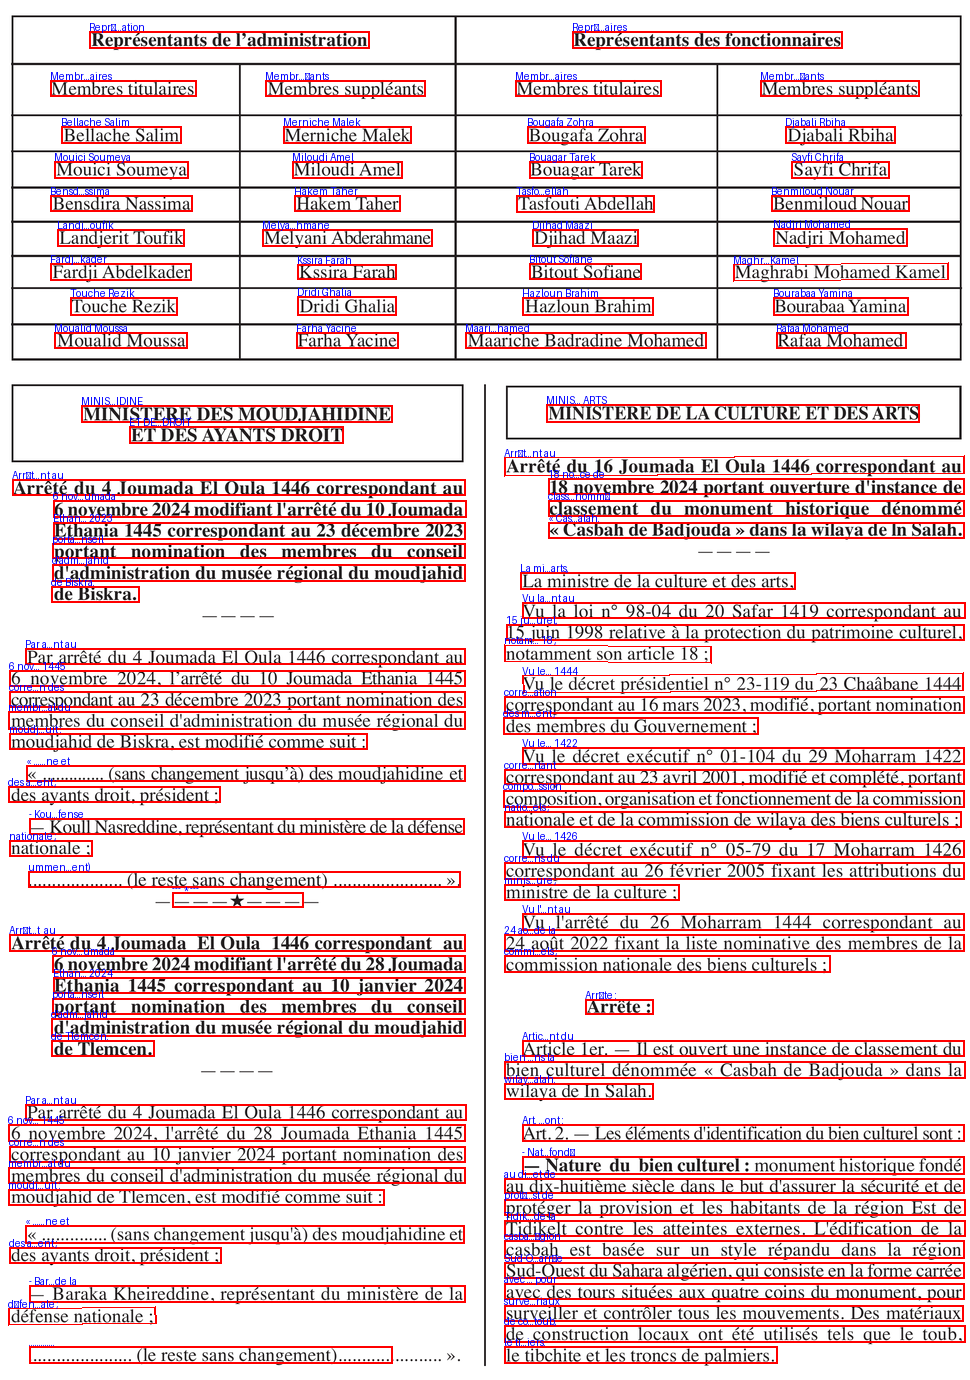

In [62]:
imageTest.draw_text_on_image()

Recognizing Text: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:21<00:00, 50.39s/it]


In [10]:
imageTest = ImageBuilder(image=parserImages.images[6], layout_data=layouts, text_data=detected_textes)

In [63]:
res = imageTest.match_making_texts_to_layouts(margin=15)

In [64]:
res 

[{'bbox_text': [[89.0, 31.0, 369.0, 48.0],
   [572.0, 31.0, 842.0, 48.0],
   [50.0, 80.0, 196.0, 96.0],
   [265.0, 80.0, 425.0, 96.0],
   [515.0, 80.0, 661.0, 96.0],
   [760.0, 80.0, 919.0, 96.0],
   [61.0, 126.0, 181.0, 143.0],
   [283.0, 126.0, 411.0, 143.0],
   [527.0, 126.0, 645.0, 143.0],
   [785.0, 126.0, 895.0, 143.0],
   [54.0, 161.0, 188.0, 178.0],
   [292.0, 161.0, 402.0, 178.0],
   [529.0, 161.0, 642.0, 178.0],
   [791.0, 161.0, 889.0, 178.0],
   [50.0, 195.0, 192.0, 211.0],
   [294.0, 195.0, 400.0, 211.0],
   [516.0, 195.0, 654.0, 212.0],
   [771.0, 195.0, 909.0, 211.0],
   [773.0, 228.0, 907.0, 246.0],
   [57.0, 229.0, 184.0, 246.0],
   [262.0, 229.0, 432.0, 246.0],
   [532.0, 229.0, 638.0, 246.0],
   [50.0, 263.0, 191.0, 280.0],
   [529.0, 263.0, 641.0, 279.0],
   [297.0, 264.0, 396.0, 279.0],
   [733.0, 264.0, 948.0, 279.0],
   [297.0, 296.0, 396.0, 315.0],
   [70.0, 297.0, 177.0, 315.0],
   [522.0, 297.0, 653.0, 315.0],
   [773.0, 297.0, 908.0, 315.0],
   [54.0, 332.0, 

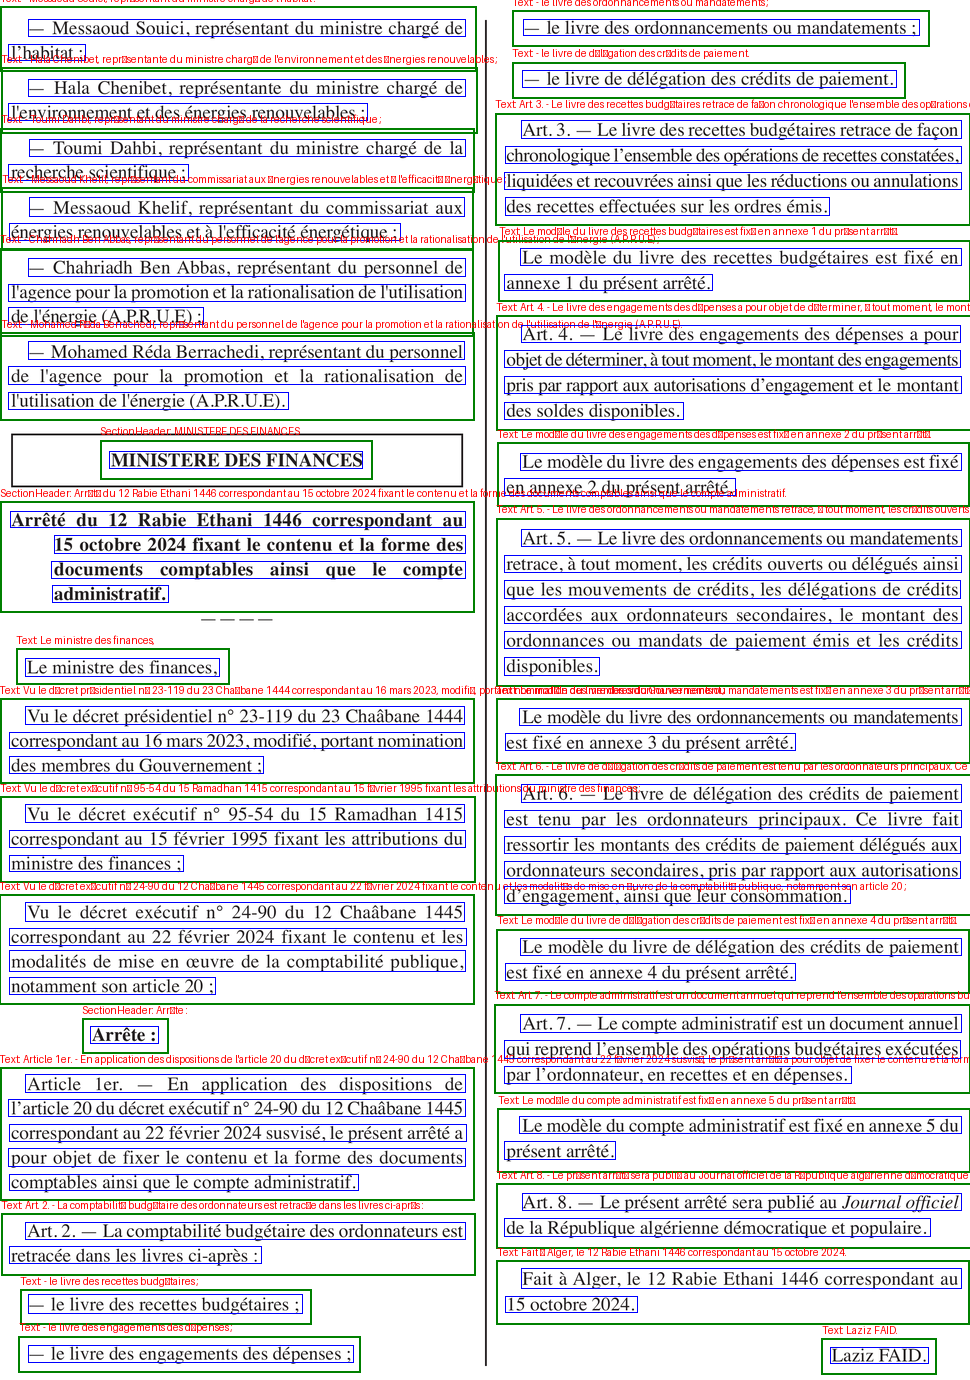

In [23]:
imageTest.visualize_margin_and_layout(margin=10)

In [17]:
JoradpImporter.download_pdfs_for_year('2022')

Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022001.pdf
Downloaded: ./downloads/2022/F2022001.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022002.pdf
Downloaded: ./downloads/2022/F2022002.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022003.pdf
Downloaded: ./downloads/2022/F2022003.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022004.pdf
Downloaded: ./downloads/2022/F2022004.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022005.pdf
Downloaded: ./downloads/2022/F2022005.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022006.pdf
Downloaded: ./downloads/2022/F2022006.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022007.pdf
Downloaded: ./downloads/2022/F2022007.pdf
Attempting to download: https://www.joradp.dz/FTP/jo-francais/2022/F2022008.pdf
Downloaded: ./downloads/2022/F2022008.pdf
Attempting to download: 